Retrieving SummaryDoc documents:   0%|          | 0/124 [00:00<?, ?it/s]

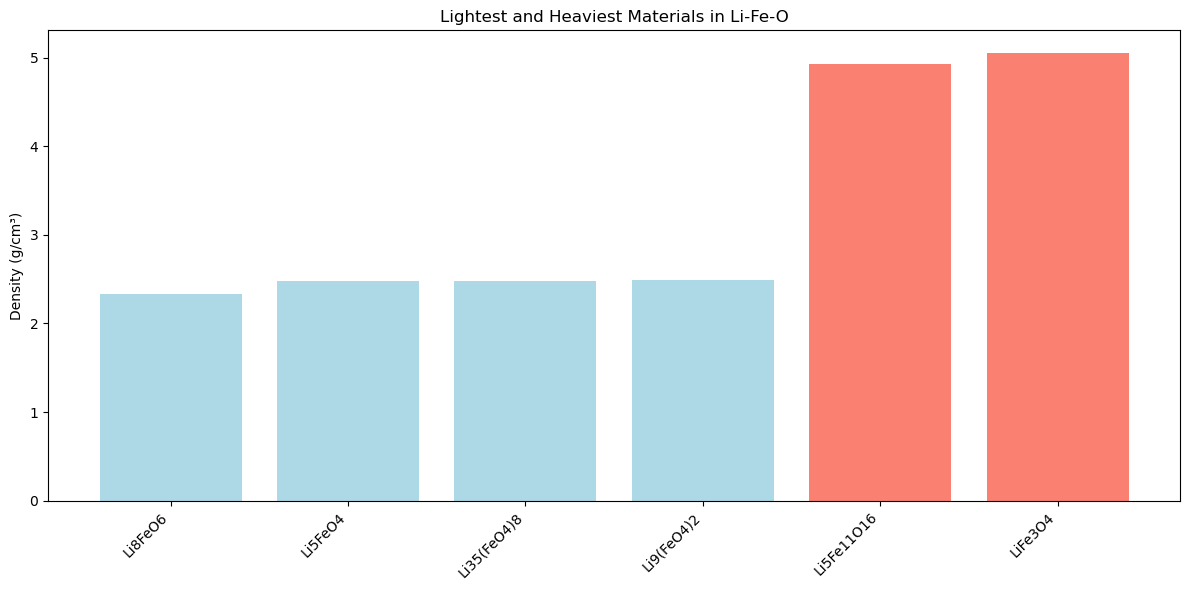

In [6]:
#2.3
from mp_api.client import MPRester
import matplotlib.pyplot as plt

# Replace this with your 32-character Materials Project API key
API_KEY = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

# Define the chemical system (e.g., "Li-Fe-O")
chemical_system = "Li-Fe-O"

# Connect to Materials Project
with MPRester(API_KEY) as mpr:
    results = mpr.materials.summary.search(
        chemsys=chemical_system,
        fields=["formula_pretty", "density"],
        energy_above_hull=(0, 0.1)  # Only stable or nearly stable materials
    )

# Filter out materials with no density data
results = [r for r in results if r.density is not None]

# Sort by density
sorted_results = sorted(results, key=lambda x: x.density)

# Choose top N lightest and heaviest
N = 5
lightest = sorted_results[:N]
heaviest = sorted_results[-N:]

# Combine for plotting
to_plot = lightest + heaviest
labels = [r.formula_pretty for r in to_plot]
densities = [r.density for r in to_plot]

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, densities, color=['lightblue'] * N + ['salmon'] * N)
plt.ylabel("Density (g/cm³)")
plt.title(f"Lightest and Heaviest Materials in {chemical_system}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()